# Pick out the people and timestamps of all messages

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} pathlib

Solving environment: done

# All requested packages already installed.



In [2]:
import os
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

dir = r'/Users/amandahutter/Documents/PythonCode/Facebook/facebook-amandahutter/messages/inbox' #PUT YOUR OWN PATH HERE


In [3]:
# Create variables 
bucket_size = 2629743000 # milliseconds per month 
timestamp_start = 1199163600000 # January 1st, 2008 in Epoch Time 

y_max = 19
start_year = 2008
end_year = 2019

my_name = 'Amanda Grace Hutter'

In [4]:
data = {}

subdirs = [x[0] for x in os.walk(dir)]  

for subdir in subdirs:
    if Path(subdir+'/message.json').is_file():
        with open(subdir+'/message.json', 'r') as f:
            d = json.load(f) 
            if 'participants' in d.keys() and 'messages' in d.keys():
                people_count = len(d['participants'])
                message_count = len(d['messages'])
                for person in d['participants']: 
                    if person['name'] not in data.keys():
                        data[person['name']] = [] 
                    if people_count <= 2:
                        for message in d['messages']:
                            data[person['name']].append(message['timestamp_ms'])  
                                           

# Let's plot averages over time

In [5]:
num_buckets = int((end_year - start_year)*12)
buck_results = {}

for person, timestamp_list in data.items():
    buck_results[person] = np.zeros(num_buckets)
    for timestamp_ms in timestamp_list:
        this_bucket = int((timestamp_ms - timestamp_start)/bucket_size)     
        buck_results[person][this_bucket] += 1

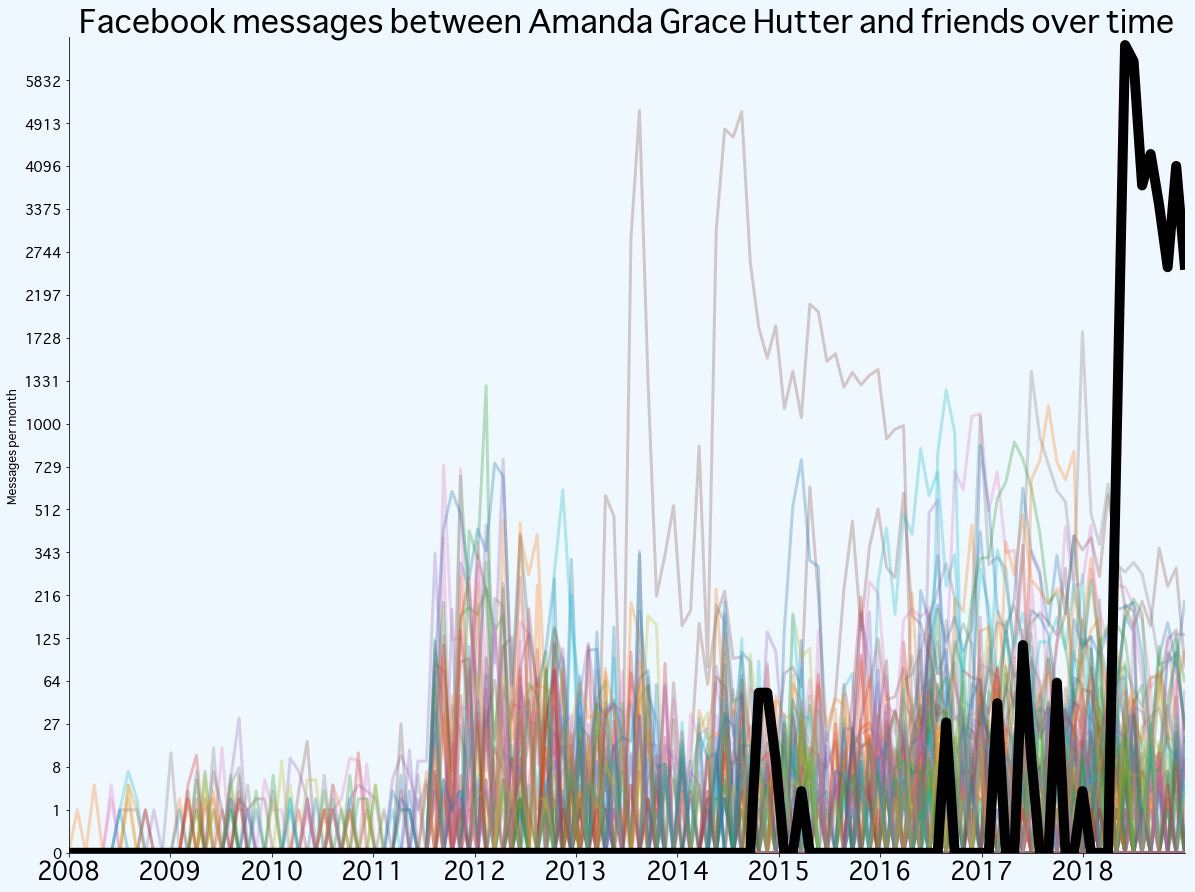

In [6]:
person_highlighted = 'Eric Bailey'

 
fig = plt.figure(figsize=(20, 15),facecolor='aliceblue')
ax = fig.add_subplot(1, 1, 1) 
ax.set_yticks(range(0, y_max))
ax.set_yticklabels([str(x**3) for x in range(0, y_max)],fontsize=14,fontweight='bold',fontname='Sathu') # number of messages in a month 
ax.set_xticks(range(start_year, end_year))
ax.set_xticklabels([str(x) for x in range(start_year, end_year)],fontsize=24,fontweight='bold',fontname='Sathu')
ax.set_facecolor("aliceblue")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


plt.ylim(0, y_max)
plt.xlim(start_year, end_year)
plt.ylabel('Messages per month',
           fontweight = 'bold',fontname='Sathu',fontsize=12)
plt.title(f'Facebook messages between {my_name} and friends over time', 
         fontweight = 'bold', fontname='Sathu', fontsize=32)


for person in data.keys():
    if person != my_name:
        plt.plot(np.linspace(start_year, end_year, num_buckets),
                 pd.Series(buck_results[person])**0.33,
                 alpha=0.3,linewidth=3.0)
if person_highlighted is not None:
    plt.plot(np.linspace(start_year, end_year, num_buckets),
             pd.Series(buck_results[person_highlighted])**0.33,
             alpha=1.0,linewidth=10.0,color='black')
    
